# Think Like a Machine - Chapter 2
Linear Regression
=================

**ACKNOWLEDGEMENT**

**The contents of this notebook are adapted from John D. Wittenauer's notebooks that cover the exercises in Andrew Ng's course on Machine Learning on Coursera. This is mostly Wittenauer's and Ng's work and acknowledged as such.**

Linear regression has been in use for hundreds of years. What place does it have in the shiny new field of machine learning? It's the same end result you've learned in your stats classes, but the method for getting there is via the steps of thinking like a machine outlined in Chapter 1. We'll go through these steps again in this chapter.

## The Business Problem: Predicting Restaurant Profits

You're the CEO of a restaurant franchise. Your restaurants operate in a number of small towns. You're thinking of how to grow the business. Where's the best place to put the next restaurant?

For each restaurant your company owns and operates, you have the population of the town the restaurant is located in and the most recent year's profit generated by the restaurant. Let's have a look at this data.

## Load the Data

In [2]:
# Load up the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
path = os.getcwd() + '/Data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
# Quick check on what we have
data.shape

(97, 2)

The first few rows of our data look like this:

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The complete data set can be described using the traditional statistical descriptors:

In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Exercise 2-1
Based on the descriptive statitistics above, how would you summarize this data for the CEO of the company in a few sentences?

## Visualize the Data

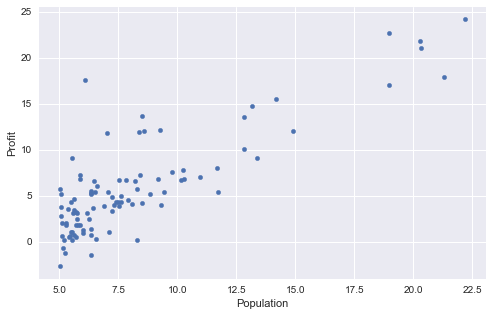

In [7]:
data.plot.scatter(x='Population', y='Profit', figsize=(8,5))

## Step 1: Define the Input(s)
For this data, we have a single input -- *town population*. We have 97 different town populations in our dataset. That's 97 different values for our single input variable. Keep in mind that each value is in 10,000s. So multipy the value you see by 10,000 to get the actual value of the population.

In [8]:
# Here are the input values
# Number of colums in our dataset
cols = data.shape[1]
# Inputs are in the first column - indexed as 0
X = data.iloc[:, 0:cols-1]
print "number of columns %d" %cols
print "sample inputs \n %s" %X.head()

number of columns 2
sample inputs 
    Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598


## Step 2: Define the Output
The output is *annual restaurant profit*. For each value of the input we have a value for the output. Keep in mind that each value is in \$10,000s. So multipy the value you see by \$10,000 to get the actual annual profit for the restaurant.

Let's look at some of these output values.

In [9]:
# Here are the output vaues
# Outputs are in the second column - indexed as 1
y = data.iloc[:, cols-1:cols]

In [10]:
# See a sampe of the outputs
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


## Step 3: Define the Model
We're trying to describe this data in a succinct way. Think of it this way: the inputs (population sizes) are being transformed into food truck revenues. How can we write this transformation? There are many (infinite) options. But we're going to start very simply.

$$y = h_{\theta}(X) = \theta_{0} * x_{0}\ +\ \theta_{1} * x_{1}$$ 

This looks fancy, but it's not. It's a simple linear equation that transforms an input into an output. Let's define the notation -- we'll use this throughout and it will start to become second nature very soon.

$y$ is a vector, aka a 1-dimensional matrix of output values. Don't panic -- we're not going to do linear algebra. We're going to use matrices to represent our inputs, outputs, and parameters. We'll do a few simple things with these matrices like addition, subtraction and multiplication -- that's it.

$h$ is our model -- named after the word "hypothesis". It describes how to transform X to y, hence it is a function of $X$.

X is the matrix of input values. It is typically a 2-dimensional matrix with $m$ rows and $n$ columns. In our dataset we have a single input -- the population. The $x_{0}$ input that appears here is just manufactured for notational convenience -- we'll always set it to be 1.

$\theta_{0}$ and $\theta_{1}$ are the *parameters* of the model. Unlike our example of the boiling water in Chapter 1, these parameters can each take on an infinite number of values. $\theta_{0}$ is called the *bias value*.

With this model, we know exactly how to transform an input into an output -- that is, once the values of the parameters are given.

## Step 4: Define the Parameters of the Model
As we saw in the description of the model, $\theta_{0}$ and $\theta_{1}$ are the parameters of our model.

Let's pick a value of X from the dataset, fix a specific value for $\theta_{0}$ and $\theta_{1}$, and see what we get for the value of y.

Specifically, let
$\begin{bmatrix}
\theta_{0} \\
\theta_{1}
\end{bmatrix} = 
\begin{bmatrix}
-10 \\
1
\end{bmatrix}$. This means $\theta_{0}$ is -10 and $\theta_{1}$ is 1.

In [11]:
# The value of y for specific values of X and parameters theta_0 and theta_1
theta = np.matrix(np.array([-10,1]))

# Get the first value of X and transform it into y using the parameters theta
output_1 = theta[0,0]*1 + theta[0,1]*X.values[1]

# Try a different X value but keep the parameters the same
output_2 = theta[0,0]*1 + theta[0,1]*X.values[20]

[output_1, output_2]

[array([-4.4723]), array([-3.8109])]

In [12]:
# Actual output value in the dataset
[y.values[1], y.values[20]]

[array([ 9.1302]), array([ 3.1386])]

We see that the output values generated by the model with the particular parameter values we picked are quite far from the actual values of the output. This brings us to the cost of getting it wrong.

## Exercise 2-2
Randomly choose a set of values for $\theta_{0}$ and $\theta_{1}$ and plot the line they produce for all values of populations in the data set.

## Step 5: Define the Cost of Getting it Wrong

The cost of getting it wrong is defined as a function $J(\theta)$:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}x^{(i)}) - y^{(i)})^2$$

What we're saying here: For each input, transform it using $\theta_{0}$ and $\theta_{1}$. This will give us a number. Subtract from this number the actual value of the output for that input. This gives us another number. Take this number and square it. This gives us our final result for that particular input. Add each of these final results -- one for each input we have in our dataset -- and divide it by $2m$ -- that is, twice the number of data points in our data set. This last division step is to make the cost of getting it wrong relative to the size of the dataset -- think of it simply as a mathematical convenience.

Does this definition of the cost of getting it wrong make sense? Remember, we can't change the dataset -- the inputs and the outputs are what they are. But we do have full control over the values of $\theta_{0}$ and $\theta_{1}$. When we choose particular values for $\theta_{0}$ and $\theta_{1}$, we determine the cost of getting it wrong over the entire data set.

In [13]:
def computeCost(X, y, theta):
    # Cost of being wrong calculated over the entire data set
    # Assumes that X has a first column of 1s added to it to simplify the notation
    # Therefore: X is an m x n matrix and theta is a n x 1 matrix
    
    # costPerOutput is an m x 1 matrix where each element is the cost for
    # the input and its associated output for a particular value of theta
    costPerOutput = np.power(((X * theta) - y),2)
    
    # totalCost is the cost over the entire dataset
    totalCost = np.sum(costPerOutput)
    
    # The cost of getting it wrong is 1/2m of the totalCost (normalized cost)
    cost = totalCost / (2 * len(X))
    
    return cost

Let's calculate the cost over the entire dataset of getting it wrong for 
$\begin{bmatrix}
\theta_{0} \\
\theta_{1}
\end{bmatrix} = 
\begin{bmatrix}
-10 \\
1
\end{bmatrix}$

In [14]:
# Get X and y into the right shapes for use in computeCost
# Add a first column of 1s to X
X.insert(0,'Ones', 1)

In [15]:
X.shape

(97, 2)

In [16]:
# The new form of the inputs
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [17]:
# Turn inputs, outputs and thetas into matrices to suit the costCompute function
X = np.matrix(X.values)
y = np.matrix(y.values)

In [18]:
# Choose values for theta
theta_test = np.matrix('-10;1')

In [19]:
c = computeCost(X,y,theta_test)
c

34.239206058393812

### How the Cost Varies as Theta Values Change

In [34]:
# Generate a grid of values over theta0 and theta1
# theta0 is between -5 and 5 (increments of 0.1)
# theta1 is between -2 and 2 (increments of 0.1)
theta0_vals, theta1_vals = np.mgrid[-4:4:0.1, -2:2:0.1]
# Get arrays of theta0 and theta1 values
theta_grid = np.c_[theta0_vals.ravel(), theta1_vals.ravel()]
len(theta0_vals), theta_grid.shape, theta_grid[0].T, theta_grid

(80, (3200, 2), array([-4., -2.]), array([[-4. , -2. ],
        [-4. , -1.9],
        [-4. , -1.8],
        ..., 
        [ 3.9,  1.7],
        [ 3.9,  1.8],
        [ 3.9,  1.9]]))

In [21]:
#mesh_grid = np.meshgrid(theta0_vals, theta1_vals)

In [ ]:
# Through the magic of matrix multiplication, we're going to calculate the cost for each pair of theta values
cost_vals = [computeCost(X, y, np.matrix(theta_vals).T) for theta_vals in theta_grid]

In [ ]:
# Plot the cost values
# Helpful tutorial at http://physicalmodelingwithpython.blogspot.com/2015/08/illuminating-surface-plots.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
# CAUTION Depending on the fineness of np.mgrid above, this can take a long time to execute
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
ax = Axes3D(plt.figure())
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
#ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, cost_vals, rstride=1, cstride=1)
plt.xlabel('theta 0')

## Step 6: Pick an Iterative Method to Minimize the Cost of Getting it Wrong

The cost function might have a minimum but how can we possibly find it? We can't use the brute force method of choosing every possible combination of values for $\theta-{0}$ and $\theta_{1}$ -- there are an infinite number of combinations and we'll never finish our task.

This is where the concept of *gradient descent* comes in. Imagine starting anywhere on the surface, say at $\theta_{0}$ at -10 and $\theta_{1}$ at -1. That's at the front edge of the plot above. If we took a step in the direction where the slope under our feet is steepest, then we would be one step closer to the "bottom" of the surface. So let's take that set and then take the next step in the direction where the slope under our feet is steepest. That gets us even lower and in the right direction to the bottom. Eventually, after a number of these steps, you'll get to the bottom.

That's the idea. To make it work, we have to write out an expression for the *next set of parameter values to try*. And it turns out that for the cost function $J(\theta)$, there is a well-worked out way to write these values for $\theta_{0}$ and $\theta_{1}$ based on the direction of the steepest slope.

**How To Choose the Next Set of Values for $\theta$**

$$\theta_{j} := \theta_{j} - \frac{\alpha}{m} \ [\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}]$$

## Step 7: Implement the Iterative Method

In [24]:
# Implement Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    # NOTE: X must already have a column of 1s added to it
    # X is a m x n matrix
    # y is a m x 1 matrix
    # Theta is a n x 1 matrix
    
    # Keep track of everything
    sumError = np.zeros(shape=(len(theta),1))
    sumErrorNorm = np.zeros(shape=(len(theta),1))
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)
    
    for i in range(iters):
        # Calculate the non-normalized values for each theta parameter
        error = (X * theta) - y
        
        for j in range(len(theta)):
            # Multiply the error vector by the appropriate column of the X matrix and sum it
            sumError[j] = np.sum(np.multiply(error, X[:,j]))
            
            # Normalize the sumError using alpha and m
            sumErrorNorm[j] = np.divide(np.multiply(sumError[j], alpha), len(X))
            
            temp[j,0] = theta[j,0] - sumErrorNorm[j]
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
            
    
    return theta, cost

Run the iterative gradient descent method to determine the optimal parameter values.

In [25]:
# Initialize theta, alpha, and iters
theta_init = np.matrix('-3;1.4')
alpha_init = 0.01 # the learning rate
iters_init = 2000 # number of iterations

# Run gradient descent and capture the progression of cost values and the ultimate optimal theta values
theta_opt, cost_vals = gradientDescent(X, y, theta_init, alpha_init, iters_init)
# Get the optimal theta values and the last few cost values
theta_opt, cost_vals[-10:-1]

(matrix([[-3.87231084],
         [ 1.19067582]]),
 array([ 4.47702318,  4.47702299,  4.47702281,  4.47702262,  4.47702244,
         4.47702225,  4.47702207,  4.47702189,  4.47702171]))

We can see that the cost is still getting smaller even after 2000 interations...but at the 4th decimal place.

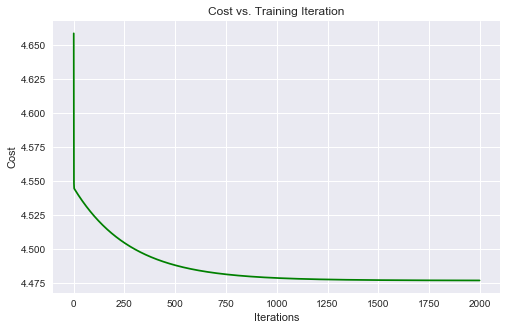

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(iters_init), cost_vals, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Iteration')

## Exercise 2-3
Experiment with different values of alpha, theta, and iters. What do you find?

## Results
Let's see how our optimal parameter values can be used to make predictions.

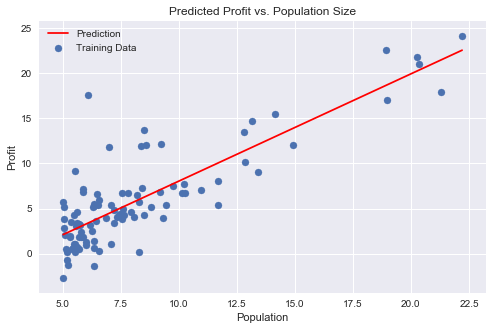

In [27]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_opt[0, 0] + (theta_opt[1, 0] * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## Exercise 2-4
Now you can make predictions of profit based on your data. But how do you know how good your predictions are?

## Summary
We took the steps we saw in Chapter 1 and applied them to one of the simplest problems in data science. The problem may have been simple but the concepts or the way of looking at the problem is what's important. We looked at the problem through the eyes of a machine. In the next chapter we'll extend our techniques to regression with multiple input variables.